Simple Linear Regression.Minimal example

### relevant libraries

In [1]:
import numpy as np # math operations
import matplotlib.pyplot as plt # Nice graphs
from mpl_toolkits.mplot3d import Axes3D #Nice 3D graphs

### Generate random input data to rain on ( this part is not machine learning) we will create fake data

In [11]:
observations = 1000
xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(low = -10, high = 10, size = (observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


In supervised learning we have the elemens : 1. inputs or data, Done 2. weights 3. biases 4. outputs 5. targets, to do

### Create the targets we will aim at

In [12]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


### Plot the training Data
The point is to see that there is a strong trend that our model should learn to reproduce

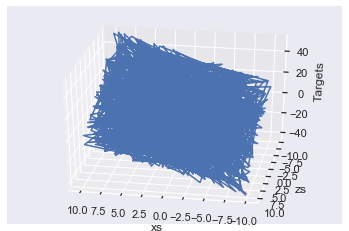

In [13]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim= 100)
plt.show()
targets = targets.reshape(observations,1)

### initialize Variables

In [14]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size = (2,1))
biases = np.random.uniform(-init_range,init_range,size = 1)
print(weights)

[[-0.09667795]
 [-0.08114923]]


In [15]:
print(biases)

[-0.0637704]


### Setting a learning rate

In [21]:
learning_rate = 0.02

### Train the model

In [25]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas **2) / 2 / observations
    print(loss)
    
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.39822759059361307
0.389281438555116
0.38068867237284404
0.3724353327978547
0.36450801199159105
0.3568938317443788
0.3495804225543239
0.3425559035326262
0.3358088631026595
0.3293283404614657
0.32310380777354897
0.3171251530680381
0.3113826638114365
0.30586701112927167
0.30056923465101376
0.29548072795364133
0.2905932245802031
0.285898784610672
0.28138978176326745
0.2770588910052952
0.27289907665337276
0.26890358094371863
0.26506591305392757
0.26137983855840274
0.2578393693003151
0.25443875366363067
0.2511724672294111
0.24803520380120186
0.24502186678493051
0.242127560909311
0.23934758427330566
0.23667742070772155
0.2341127324385357
0.23164935304003
0.2292832806662881
0.22701067155005478
0.22482783375840337
0.2227312211950602
0.22071742783964937
0.2187831822144916
0.21692534206997574
0.2151408892798635
0.21342692493823892
0.2117806646501329
0.21019943400817892
0.20868066424794154
0.20722188807487113
0.2058207356560964
0.20447493077054946
0.20318228711116385
0.2019407047331425
0.2007481

#### print the weights and biases to see if we have worked correctly

In [26]:
print(weights, biases)

[[ 1.99833372]
 [-2.99300278]] [4.90141053]


### plot the last outputs vs targets,
Since they are the last ones at the end of the training , they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer the target to the output value

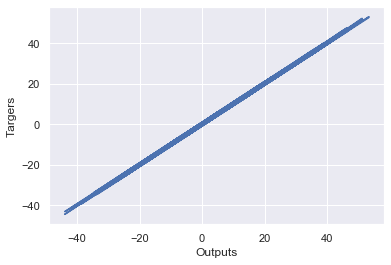

In [27]:
plt.plot(outputs, targets)
plt.xlabel('Outputs')
plt.ylabel('Targers')
plt.show()